In [101]:
import pandas as pd

In [102]:
import numpy as np 
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,recall_score,f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler
from sklearn.decomposition import PCA


In [103]:
df=pd.read_csv('processed.cleveland.csv')

In [104]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [105]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [106]:
df.shape

(303, 14)

In [107]:
#df.info()

In [108]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

In [109]:
df['ca'].fillna(df['ca'].mean(),inplace=True )
df['thal'].fillna(df['thal'].mean(),inplace=True )

In [110]:
#df.isna().sum()

In [111]:
#df['target'].unique()

In [112]:
#df.describe()

In [113]:
#df.nunique().sort_values()

In [114]:
#df.corr()

In [115]:
#correlation=df.corr()
#top_cor_feature=correlation.index
#plt.subplots(figsize=(20,25))
#g=sns.heatmap(df[top_cor_feature].corr(),annot=True,cmap="RdYlGn")
#plt.show()

In [116]:
df['target'].value_counts()

0    164
1     55
2     36
3     35
4     13
Name: target, dtype: int64

In [117]:
x=df.drop(['target'],axis=1)
y=df['target']


In [118]:
#fd=pd.get_dummies(fd,drop_first=True)
dummies=pd.get_dummies(df['target'],drop_first=True,prefix='target')
df = pd.concat([df, dummies], axis=1)
df



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,target_1,target_2,target_3,target_4
0,63,1,1,145,233,1,2,150,0,2.3,3,0.000000,6.0,0,0,0,0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.000000,3.0,2,0,1,0,0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.000000,7.0,1,1,0,0,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.000000,3.0,0,0,0,0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.000000,3.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.000000,7.0,1,1,0,0,0
299,68,1,4,144,193,1,0,141,0,3.4,2,2.000000,7.0,2,0,1,0,0
300,57,1,4,130,131,0,0,115,1,1.2,2,1.000000,7.0,3,0,0,1,0
301,57,0,2,130,236,0,2,174,0,0.0,2,1.000000,3.0,1,1,0,0,0


In [120]:
x=df.drop(['target_1'],axis=1)
y=df['target_1']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

C:\Users\RANJEET\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.819672131147541

In [122]:
y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.819672131147541
Precision: 0.819672131147541
Recall: 0.819672131147541
F1-score: 0.819672131147541


In [86]:
#df.dtypes

In [22]:
#from sklearn.ensemble import ExtraTreesRegressor
#model = ExtraTreesRegressor()
#model.fit(x,y)
#print(model.feature_importances_)


In [23]:
#feature_imp=pd.Series(model.feature_importances_,index=x.columns)
#feature_imp.nlargest(6).plot(kind='bar')

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [25]:

clf=RandomForestClassifier()

In [26]:
clf.fit(x_train,y_train)

RandomForestClassifier()

In [27]:
clf.score(x_train,y_train)

1.0

In [28]:
clf.score(x_test,y_test)

0.4918032786885246

In [29]:
y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')
#roc_auc = roc_auc_score(y_test, y_pred, average='micro')


In [30]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
#print("ROC AUC score:", roc_auc)

Accuracy: 0.4918032786885246
Precision: 0.4918032786885246
Recall: 0.4918032786885246
F1-score: 0.4918032786885246


In [31]:
# improve the model 
# try diffrent amount of n_estimators 
np.random.seed(42)
for i in range(10,100,10):
    print(f'Trying model with {i} estimators...')
    clf=RandomForestClassifier(n_estimators=i).fit(x_train,y_train)
    print(f'model accuracy on test set: {clf.score(x_test,y_test)*100:2f}%')
    print(" ")

Trying model with 10 estimators...
model accuracy on test set: 50.819672%
 
Trying model with 20 estimators...
model accuracy on test set: 50.819672%
 
Trying model with 30 estimators...
model accuracy on test set: 47.540984%
 
Trying model with 40 estimators...
model accuracy on test set: 50.819672%
 
Trying model with 50 estimators...
model accuracy on test set: 52.459016%
 
Trying model with 60 estimators...
model accuracy on test set: 55.737705%
 
Trying model with 70 estimators...
model accuracy on test set: 55.737705%
 
Trying model with 80 estimators...
model accuracy on test set: 45.901639%
 
Trying model with 90 estimators...
model accuracy on test set: 52.459016%
 


In [32]:

# put model in dictionary
models={"Logistic Regression":LogisticRegression(),
       "KNN": KNeighborsClassifier(),
       "Random Forest":  RandomForestClassifier()}

In [33]:
# create a function to fitt and score model

def fit_and_score(models,x_train,x_test,y_train,y_test):
    np.random.seed(42)
    # make a dictionary to keep model scores
    model_score={}
    #loop through models
    for name,model in models.items():
    #fit  the model
           model.fit(x_train,y_train)
    # evaluate the model and append its score to model_score
           model_score[name]=model.score(x_test,y_test)
    return model_score

In [34]:
model_score=fit_and_score(models=models,
                         x_train=x_train,
                         x_test=x_test,
                         y_train=y_train,
                         y_test=y_test)
model_score

C:\Users\RANJEET\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\RANJEET\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid

{'Logistic Regression': 0.5573770491803278,
 'KNN': 0.4426229508196721,
 'Random Forest': 0.4918032786885246}

In [35]:
# Create a hyperparameter grid for LogisticRegression

log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [36]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [37]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [38]:
rs_log_reg.score(x_test,y_test)

0.5409836065573771

In [39]:
model_score

{'Logistic Regression': 0.5573770491803278,
 'KNN': 0.4426229508196721,
 'Random Forest': 0.4918032786885246}

In [40]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(x_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [41]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [42]:
gs_log_reg.score(x_test, y_test)

0.5245901639344263

In [43]:
cv_acc = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc.mean()

0.5904918032786884

In [44]:
#confusion matrix
print(confusion_matrix(y_test,y_pred))

[[28  0  1  0  0]
 [ 6  2  3  1  0]
 [ 5  1  0  3  0]
 [ 1  5  1  0  0]
 [ 0  2  1  1  0]]


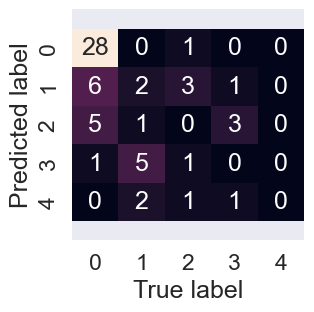

In [45]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_pred):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_pred),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, y_pred)

In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.97      0.81        29
           1       0.20      0.17      0.18        12
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         4

    accuracy                           0.49        61
   macro avg       0.18      0.23      0.20        61
weighted avg       0.37      0.49      0.42        61



C:\Users\RANJEET\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\RANJEET\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\RANJEET\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [48]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

In [49]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc

array([0.63934426, 0.62295082, 0.54098361, 0.6       , 0.56666667])

In [50]:
cv_acc = np.mean(cv_acc)
cv_acc

0.5939890710382514

In [51]:
# Preprocess your data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [52]:

# Perform feature selection with PCA
pca = PCA(n_components=10)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [53]:
rf = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=2, random_state=42)
#rf=RandomForestClassifier(n_estimators= 1100,min_samples_split= 15,min_samples_leaf=10,max_depth=5)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [54]:
# Evaluate your model
y_pred = rf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')
#roc_auc = roc_auc_score(y_test, y_pred, average='micro')


In [55]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
#print("ROC AUC score:", roc_auc)

Accuracy: 0.5409836065573771
Precision: 0.5409836065573771
Recall: 0.5409836065573771
F1-score: 0.5409836065573771


In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler
from imblearn.over_sampling import RandomOverSampler
import numpy as np
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=3, 
                             max_depth=2,
                             random_state=42)

In [57]:
# Fit RandomForestClassifier
rfc.fit(x_train, y_train)
# Predict the test set labels
y_pred = rfc.predict(x_test)


C:\Users\RANJEET\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\RANJEET\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\RANJEET\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.53      1.00      0.69        29
           1       1.00      0.08      0.15        12
           2       0.00      0.00      0.00         9
           3       0.50      0.29      0.36         7
           4       0.00      0.00      0.00         4

    accuracy                           0.52        61
   macro avg       0.41      0.27      0.24        61
weighted avg       0.50      0.52      0.40        61



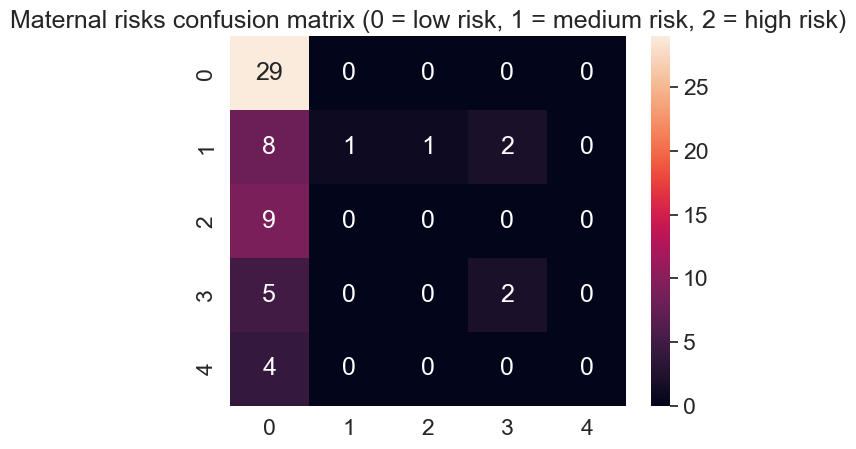

In [58]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d').set_title('Maternal risks confusion matrix (0 = low risk, 1 = medium risk, 2 = high risk)')

print(classification_report(y_test,y_pred))

In [59]:
rfc_ = RandomForestClassifier(n_estimators=900, 
                             max_depth=7,
                             random_state=42)
rfc_.fit(x_train, y_train)
y_pred = rfc_.predict(x_test)

C:\Users\RANJEET\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\RANJEET\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\RANJEET\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.75      0.93      0.83        29
           1       0.38      0.25      0.30        12
           2       0.20      0.22      0.21         9
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         4

    accuracy                           0.52        61
   macro avg       0.27      0.28      0.27        61
weighted avg       0.46      0.52      0.49        61



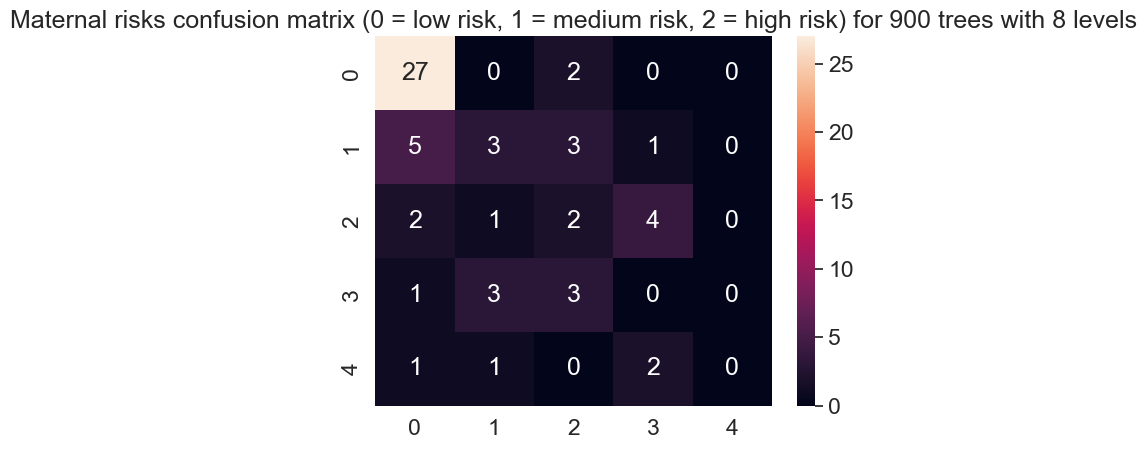

In [60]:
cm_ = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_, annot=True, fmt='d').set_title('Maternal risks confusion matrix (0 = low risk, 1 = medium risk, 2 = high risk) for 900 trees with 8 levels')

print(classification_report(y_test,y_pred))

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, hamming_loss
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler
import pandas as pd
import numpy as np

# Load the heart disease dataset
df = pd.read_csv('processed.cleveland.csv')

df['ca'].fillna(df['ca'].mean(),inplace=True )
df['thal'].fillna(df['thal'].mean(),inplace=True )

# Split the dataset into features and target variable
X = df.drop("target", axis=1)
y = df["target"]

# Preprocess the data
scaler = StandardScaler()
X = scaler.fit_transform(X)


# Convert the target variable to a list of labels
labels = df["target"].apply(lambda x: [x])

# Convert the target variable to binary format
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(labels)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Classification model
rf = RandomForestClassifier(n_estimators=300, max_depth=20, min_samples_split=2, random_state=42)
rf.fit(X_train, y_train)

# Predict the target variable for the testing set
y_pred = rf.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
hamming_loss = hamming_loss(y_test, y_pred)

print("Accuracy:", accuracy)
print("Hamming Loss:", hamming_loss)


Accuracy: 0.4426229508196721
Hamming Loss: 0.13442622950819672


In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
lr = LogisticRegression(solver='lbfgs', multi_class='auto')
clf = GridSearchCV(lr, param_grid, cv=5)
clf.fit(x_train, y_train)

print("Best parameters:", clf.best_params_)
print("Best score:", clf.best_score_)

C:\Users\RANJEET\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\RANJEET\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\RANJEET\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1508, in fit
    X, y = self._validate_data(
  File "C:\Users\RANJEET\Anaconda3\lib\site-packages\sklearn\base.py", line 581, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\RANJEET\

ValueError: y should be a 1d array, got an array of shape (242, 5) instead.